In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [110]:
url = r"D:\Supervised Machine Learning lab (SMLL)\3\Practice-1 Manufacturing.csv"
df = pd.read_csv(url)
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [111]:
X = X = df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 
        'Material Fusion Metric', 'Material Transformation Metric']]
y = df['Quality Rating']


In [112]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Vif dataframe
vif_data = pd.DataFrame()
for i in range(X.shape[1]):
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                          Feature         VIF
0                Temperature (°C)  113.050204
1                  Pressure (kPa)   49.349434
2          Temperature x Pressure   72.745768
3          Material Fusion Metric  764.593283
4  Material Transformation Metric  219.003134


In [113]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [114]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Vif dataframe
vif_data = pd.DataFrame()
for i in range(X.shape[1]):
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature         VIF
0        0   92.760519
1        1   22.782171
2        2   19.174847
3        3  300.197535
4        4   99.639939


In [115]:
X.drop(X.columns[3], axis=1, inplace=True)

In [116]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Vif dataframe
vif_data = pd.DataFrame()
for i in range(X.shape[1]):
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature        VIF
0        0  24.566249
1        1  12.900307
2        2  19.153063
3        4  17.623707


In [117]:
y

0        99.999971
1        99.985703
2        99.999758
3        99.999975
4       100.000000
           ...    
3952    100.000000
3953     99.999997
3954     99.989318
3955     99.999975
3956    100.000000
Name: Quality Rating, Length: 3957, dtype: float64

In [118]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2769, 4) (1188, 4) (2769,) (1188,)


In [120]:
# Implementing the Linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# For Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [121]:
y_pred.shape

(1188,)

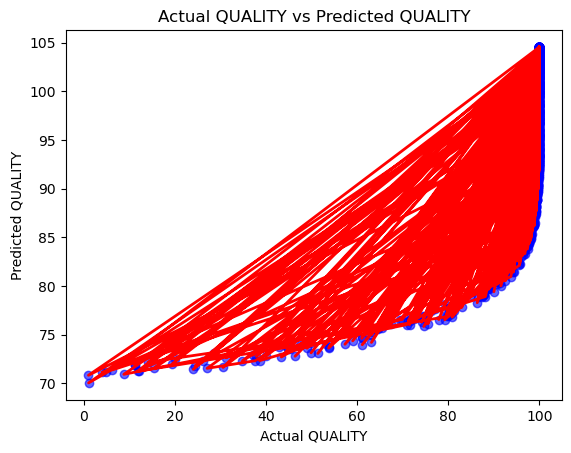

In [122]:
plt.scatter(y_test, y_pred, color='blue',alpha=0.6)
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Actual QUALITY vs Predicted QUALITY')
plt.xlabel('Actual QUALITY')
plt.ylabel('Predicted QUALITY')
plt.show()


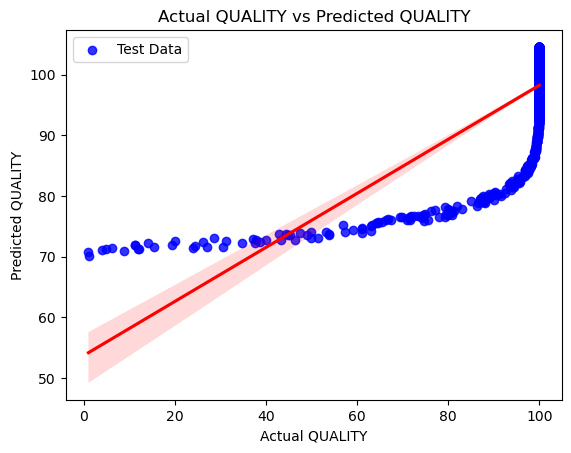

In [123]:
sns.regplot(x=y_test, y=y_pred, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, label="Test Data")
plt.xlabel('Actual QUALITY')
plt.ylabel('Predicted QUALITY')
plt.title('Actual QUALITY vs Predicted QUALITY')
plt.legend()
plt.show()

In [124]:
#Metrics 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  100.06958965362516
Root Mean Squared Error:  10.003478877551807
R2 Score:  0.5004768505711403


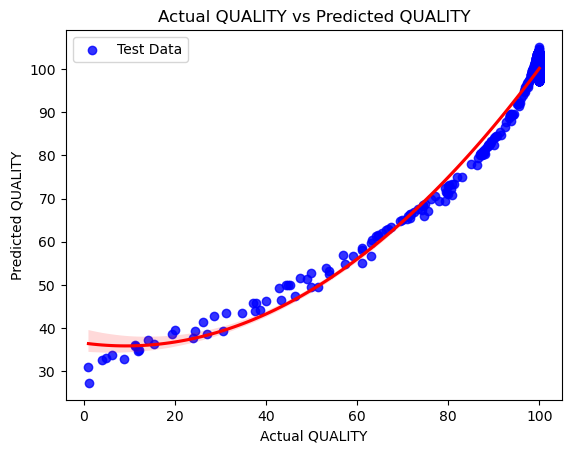

In [125]:
# For Polynomial Regression with degree 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)
y_pred2 = lin_reg2.predict(poly_reg.fit_transform(X_test))

sns.regplot(x=y_test, y=y_pred2, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, order=2, label="Test Data")
plt.xlabel('Actual QUALITY')
plt.ylabel('Predicted QUALITY')
plt.title('Actual QUALITY vs Predicted QUALITY')
plt.legend()
plt.show()



In [126]:
# Metrics
mse = mean_squared_error(y_test, y_pred2)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print("Mean Squared Error: ", mse)  
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  15.26909748852792
Root Mean Squared Error:  3.907569255755798
R2 Score:  0.923780364316409


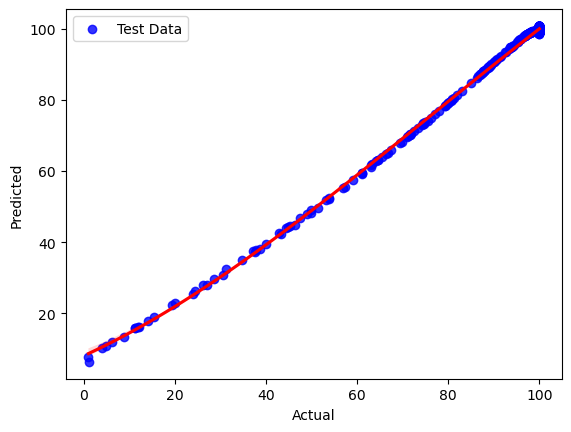

In [127]:
# For Polynomial Regression with degree 3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)

lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly, y_train)

y_pred3 = lin_reg3.predict(poly_reg.fit_transform(X_test))

sns.regplot(x=y_test, y=y_pred3, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, order=3, label="Test Data")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



In [128]:
# Metrics
mse = mean_squared_error(y_test, y_pred3)
rmse = sqrt(mse)

r2 = r2_score(y_test, y_pred3)

print("Mean Squared Error: ", mse)

print("Root Mean Squared Error: ", rmse)

print("R2 Score: ", r2)



Mean Squared Error:  0.6158333511438949
Root Mean Squared Error:  0.7847505024808171
R2 Score:  0.9969259090983433


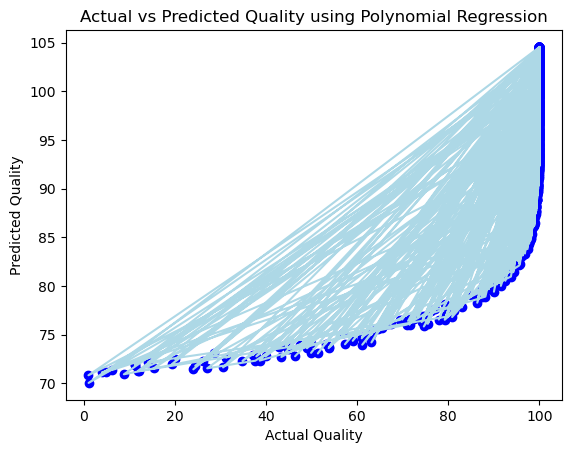

In [129]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_pred, color = 'lightblue')
plt.title("Actual vs Predicted Quality using Polynomial Regression")
plt.xlabel("Actual Quality")
plt.ylabel('Predicted Quality')
plt.show()

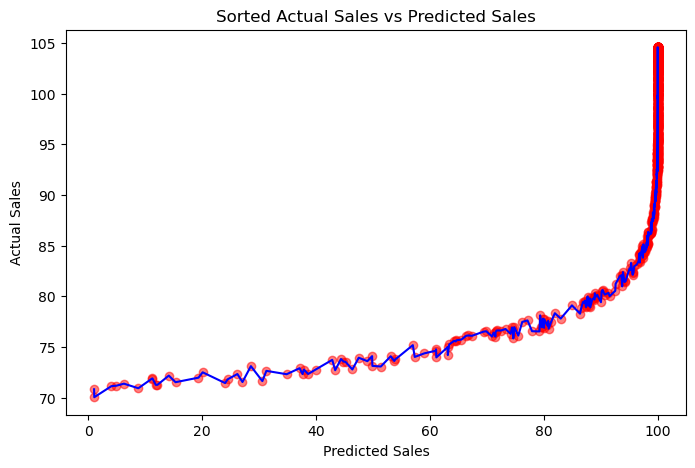

In [130]:
import numpy as np
import matplotlib.pyplot as plt
sorted_idx = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Scatter Plot (Actual vs Predicted)    
plt.figure(figsize=(8, 5))
plt.scatter(y_test_sorted, y_pred_sorted, color = 'red', alpha=0.5)
plt.plot(y_test_sorted, y_pred_sorted, color = 'blue')
plt.title('Sorted Actual Sales vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.show()
